# Introduction to Neural Networks using Keras (TensorFlow)

This tutorial is adapted from Chapter 10 of Geron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.

"Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. Its documentation (or specification) is available at https://keras.io/. The reference implementation, also called Keras, was developed by François Chollet as part of a research project14 and was released as an open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, and beautiful design." (Geron, 2019).

TensorFlow itself now comes bundled with its own Keras implementation, tf.keras. We will use TensorFlow's Keras API in this tutorial.

## Implementing (Multi-layer Perceptrons) MLPs with Keras

### Building an Image Classifier Using the Sequential API

In this tutorial we will use the Fashion MNIST dataset, which is a drop-in replacement of MNIST (digit dataset from a previous tutorial). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [3]:
# Import TensorFlow (so that we can use Keras)
import tensorflow as tf

# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Select 55,000 datapoints for training and 5,000 datapoints for testing
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
# Check size of the training data and test/validation data
print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


As we've done with the MNIST dataset (handwritten digits), to preprocess the images for the neural network we divide the grayscale values in each pixed by 255 its maximum value. This is a common way of scaling image data.

In [8]:
# Preprocess training and test data
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

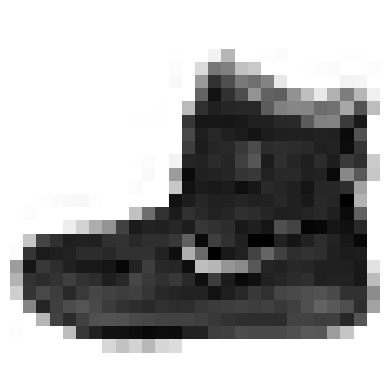

In [17]:
# Plot one example raw image
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
# Define names of the classes in the dataset (Fashion items)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

It is awlways a good idea when possible to explore the dataset before using it to train the machine learning/neural network model. In this case we will visualise a few random images (raw training data) with their corresponding targets/labels (what we are trying to predict once the model has trained).

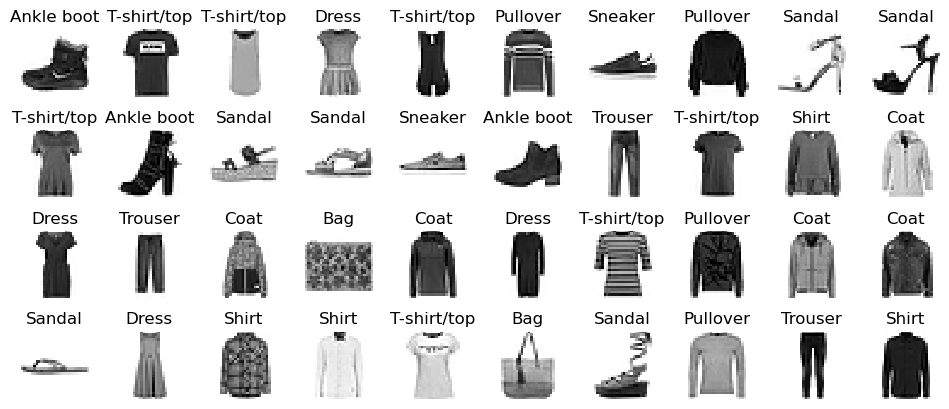

In [12]:
# Plot several data points with correspondings labels
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now we are going to create the classification network (MLP classification model) using Keras and the sequential API (there are others ways to define the model in Keras and Tensorflow, see their documentation for more details). This API is simple to use and flexible enough for what we need in this tutorial.

For our neural network, we need an input layer with input shape the size of the input images (28x28 pixels), we are going to use two hidden layers (called Dense layers), one with 300 and one with 100 neurons, and an output layer with 10 neurons (because we have 10 different classes, fashion items to classify).

In [18]:
# Extra code to clear tensorflow session and set random seed (so we can reproduce the same results)
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# Define neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

One way to check the model (number of layers, number of parameters, etc.) that has just been created is to use the summary() function:

In [19]:
# Show summary of neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


One can also display the layers of the model as follows:

In [20]:
# Show layers of the neural network
model.layers

In [36]:
# Get name of a specific layer, in this case layer 2
hidden1 = model.layers[1]
hidden1.name

'dense'

On other way of obtaining a layer from the model is to use get_layer():

In [38]:
# Get layer
model.get_layer('dense_1') is hidden1

False

A very import method is the get_weights() method to obtain the parameters (weights and biases) of each layer:

In [39]:
weights, biases = hidden1.get_weights()

Check if the weights have the correct shape (in this case 28x28=784 by 300, which is the number of neurons for this layer).

In [40]:
# Check size of weights for this layer
weights.shape

(784, 300)

The weights are automatically initialiseed using random values (this is important because if the weights are not randomly initialised the neural network will not train correctly).

In [41]:
# Check that weights have been randomly initialised
weights

array([[-0.06522562, -0.02509016,  0.05611588, ...,  0.01779137,
        -0.00981987,  0.01546157],
       [ 0.00872963, -0.04786604, -0.06746461, ...,  0.07315557,
         0.06606902,  0.05656044],
       [-0.03616892, -0.05891309,  0.01315404, ..., -0.05796965,
        -0.02125889, -0.04502215],
       ...,
       [ 0.02988215, -0.0545042 ,  0.06089908, ..., -0.06546779,
        -0.04701113, -0.00447906],
       [ 0.04340341,  0.07030262, -0.04539576, ..., -0.02916007,
         0.06746127,  0.04730766],
       [-0.04751437,  0.06328307,  0.06865533, ..., -0.018643  ,
         0.02734913, -0.03029611]], dtype=float32)

In [42]:
# Biases are initialised to zero
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

We have one bias value per neuron in a given hidden layer, so for this layer the bias vector should be 300x1 as can be seen below:

In [43]:
# Check size of bias vector
biases.shape

(300,)

### Compiling the model

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7225 - accuracy: 0.7611 - val_loss: 0.5077 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4905 - accuracy: 0.8285 - val_loss: 0.4651 - val_accuracy: 0.8328
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4441 - accuracy: 0.8434 - val_loss: 0.4282 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4189 - accuracy: 0.8529 - val_loss: 0.3998 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3981 - accuracy: 0.8600 - val_loss: 0.4005 - val_accuracy: 0.8584
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3811 - accuracy: 0.8661 - val_loss: 0.4020 - val_accuracy: 0.8574
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3685 - accuracy: 0.8693 - val_loss: 0.3752 - val_accurac

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


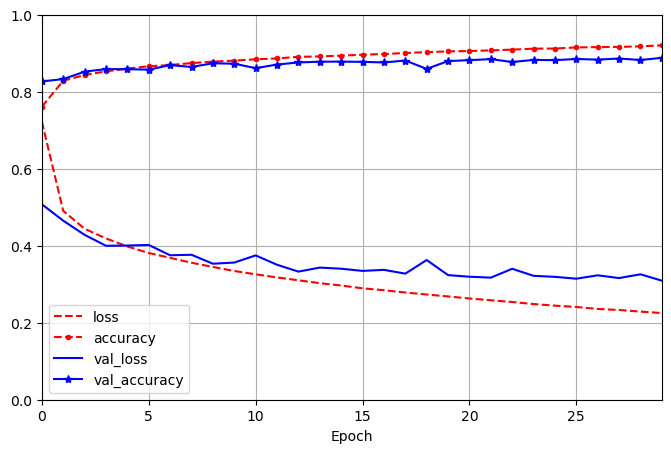

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8832


[0.3259245455265045, 0.8831999897956848]

### Using the model to make predictions

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 73ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

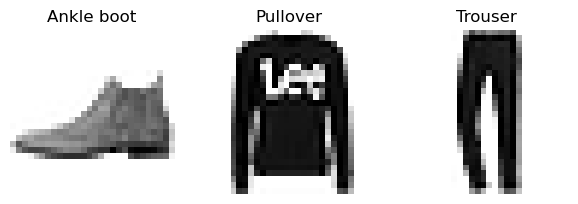

In [30]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):



In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [32]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7685 - root_mean_squared_error: 0.8766 - val_loss: 0.3718 - val_root_mean_squared_error: 0.6098
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3758 - root_mean_squared_error: 0.6130 - val_loss: 1.4724 - val_root_mean_squared_error: 1.2134
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3589 - root_mean_squared_error: 0.5991 - val_loss: 0.3247 - val_root_mean_squared_error: 0.5698
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3395 - root_mean_squared_error: 0.5826 - val_loss: 0.9710 - val_root_mean_squared_error: 0.9854
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3310 - root_mean_squared_error: 0.5753 - val_loss: 3.4153 - val_root_mean_squared_error: 1.8481
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3436 - root_mean_squared_error: 0.5862 - val_loss: 0.6218 - val_

In [33]:
rmse_test

0.5361790060997009

In [34]:
y_pred

array([[0.4644912],
       [1.0495847],
       [5.1946697]], dtype=float32)